In [2]:
!pip install plotly

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from PIL import Image
import itertools
import random
import glob

In [4]:
def LCFS(N_vertices, sequence, repetitions):
  G = nx.Graph()
  vertices = range(N_vertices)
  currentVertex = 0

  for v in vertices:
    G.add_node(v)
  for r in range(repetitions):
    for i in range(len(sequence)):
      if(sequence[i] != 0):
        target = (currentVertex + sequence[i])%N_vertices
        G.add_edge(currentVertex, vertices[target])
      currentVertex = (1 + currentVertex)% N_vertices
   
  return G

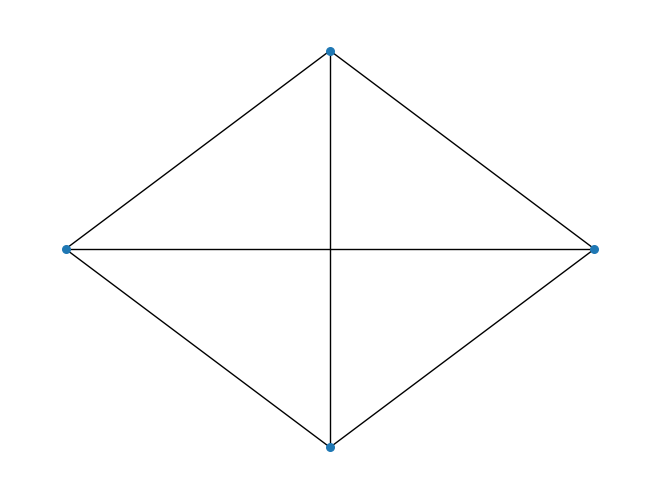

In [5]:
#k4
g = LCFS(4,[1,1,1,1,2,2],1)
nx.draw(g, nx.circular_layout(g),node_size=30) 


In [6]:
#@title 3D Plot
layt = nx.spring_layout(g,iterations = 1350, dim=3)

#layt=g.layout('fr3d', dim=3)
N = g.number_of_nodes()
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in g.edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(50,125,250)', width=4),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='Articles',
               marker=dict(symbol='circle',
                             size=4,
                             color='rgb(50,110,250)',
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               #text=labels,
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Graph",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest'
    ,paper_bgcolor='rgba(11,11,11,11)',
    plot_bgcolor='rgba(11,11,11,11)'    )

data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)
fig.show()